<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/Insect_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [ ]:
# Kết nối drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đường dẫn thư mục
folder='/content/drive/MyDrive/Colab Notebooks/Insect2/'

In [ ]:
# Tạo danh sách rỗng để lưu trữ các ảnh và nhãn
photos,labels = list(),list()

In [ ]:
# Lặp qua từng tệp trong thư mục
for file in listdir(folder):
  
  # Xác định nhãn dựa trên tên tệp
  if file.startswith('ong'):
    output=0.0
  if file.startswith('kien'):
    output=1.0
  if file.startswith('buom'):
    output=2.0
  if file.startswith('bocap'):
    output=3.0
  if file.startswith('vesau'):
    output=4.0
  if file.startswith('chuonchuon'):
    output=5.0
  if file.startswith('bohung'):
    output=6.0
  if file.startswith('chauchau'):
    output=7.0
  if file.startswith('demen'):
    output=8.0
  if file.startswith('nhen'):
    output=9.0
  if file.startswith('gian'):
    output=10.0
  if file.startswith('muoi'):
    output=11.0
  if file.startswith('borua'):
    output=12.0
  if file.startswith('bongua'):
    output=13.0
  if file.startswith('ruoi'):
    output=14.0
    
  # Tải ảnh và chuyển đổi thành mảng numpy
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)

  # Thêm ảnh và nhãn tương ứng vào danh sách
  photos.append(photo)
  labels.append(output)

In [ ]:
# Chuyển đổi danh sách ảnh và nhãn thành mảng numpy
photos = asarray(photos)
labels = asarray(labels)

# Lưu trữ dữ liệu ảnh và nhãn vào folder
save('/content/drive/MyDrive/Colab Notebooks/photo_insect.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/label_insect.npy',labels)

In [ ]:
photos.shape # Kiểm tra kích thước của dữ liệu ảnh

(1500, 100, 100, 3)

In [ ]:
labels.shape # Kiểm tra kích thước của dữ liệu nhãn

(1500,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)

In [ ]:
train_x.shape # Kiểm tra kích thước của tập huấn luyện

(1050, 100, 100, 3)

In [ ]:
test_x.shape # Kiểm tra kích thước của tập kiểm tra

(450, 100, 100, 3)

In [ ]:
# Chuyển đổi kiểu dữ liệu và chuẩn hóa giá trị ảnh
train_x = train_x.astype('float32')
train_x = train_x/255 # 0 -> 1

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical

# Chuyển đổi nhãn thành dạng one-hot vector
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [ ]:
train_x.shape # Kiểm tra kích thước của tập huấn luyện


(1050, 100, 100, 3)

In [ ]:
test_x.shape # Kiểm tra kích thước của tập kiểm tra

(450, 100, 100, 3)

In [ ]:
y_train.shape # Kiểm tra kích thước của nhãn huấn luyện

(1050, 15)

In [ ]:
y_test.shape # Kiểm tra kích thước của nhãn kiểm tra

(450, 15)

In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
classes = 15

In [ ]:
# Khởi tạo mô hình mạng neural
model = Sequential() 

In [ ]:
# Đây là lớp convolutional với 32 bộ lọc (filters) có kích thước 3x3. Hàm kích hoạt là tuyến tính (linear).
# Đầu vào của lớp này là ảnh có kích thước 100x100 và 3 kênh màu (RGB). Phép đệm (padding) được thực hiện để giữ nguyên kích thước đầu vào sau khi áp dụng convolution.
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))
# Đây là lớp LeakyReLU với hệ số rò rỉ (leak) là 0.1. LeakyReLU được sử dụng để giảm hiện tượng tắc nghẽn (dead neurons) trong mạng neural.
model.add(LeakyReLU(alpha=0.1))
# Đây là lớp max pooling với kích thước cửa sổ 2x2. Max pooling được sử dụng để giảm kích thước không gian của đầu vào và giảm độ phức tạp tính toán.
model.add(MaxPooling2D((2,2),padding='same'))

# Tiếp theo là các lớp convolutional và max pooling tương tự, nhưng với số bộ lọc và kích thước khác nhau để tăng tính phức tạp và sức mạnh của mô hình.
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
# Đây là lớp dùng để làm phẳng đầu ra của các lớp trước và chuyển nó thành một vector 1 chiều. 
# Điều này cần thiết để có thể kết nối với các lớp fully connected (dense) sau này.
model.add(Flatten())

In [ ]:
# Đây là một lớp fully connected (dense) với 700 đơn vị. Hàm kích hoạt là tuyến tính.
model.add(Dense(700,activation='linear'))
# Đây là lớp dropout với tỷ lệ dropout là 0.5. Dropout được sử dụng để ngẫu nhiên bỏ qua một số đơn vị đầu ra trong quá trình huấn luyện, nhằm tránh overfitting.
model.add(Dropout(0.5))
# Đây là lớp fully connected cuối cùng với số đơn vị tương ứng với số lớp đầu ra (classes) của bài toán phân loại. 
# Hàm kích hoạt là softmax, cho phép dự đoán xác suất của mỗi lớp đối với mỗi mẫu đầu vào.
model.add(Dense(classes,activation='softmax'))

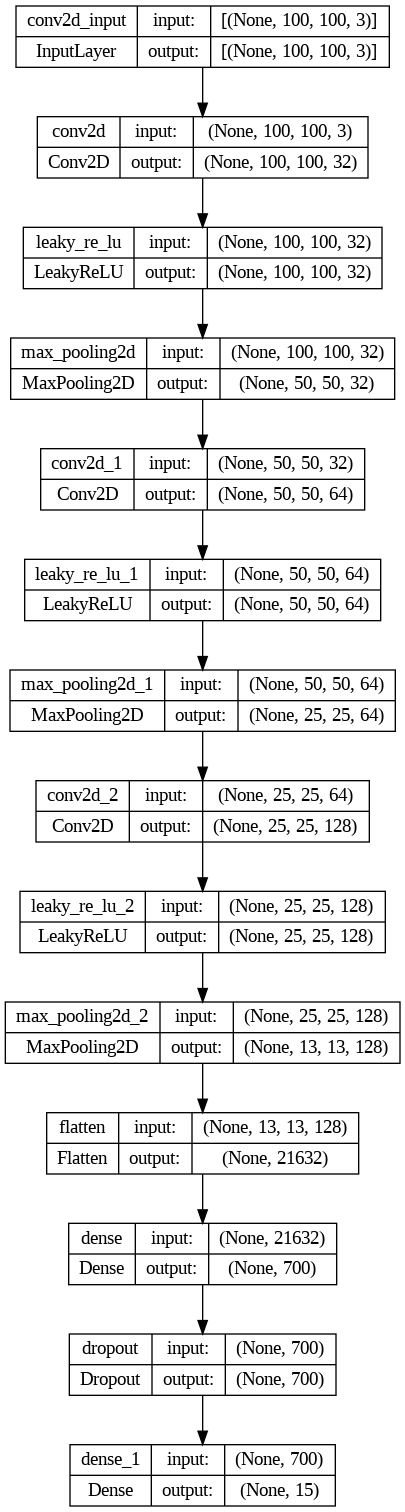

In [ ]:
from keras.utils.vis_utils import plot_model

# Vẽ mô hình và lưu nó dưới dạng hình ảnh
plot_model(model, to_file='/content/drive/MyDrive/model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy

# Biên dịch mô hình với hàm mất mát và thuật toán tối ưu
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
# Huấn luyện mô hình
train = model.fit(train_x,y_train,batch_size,epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
17/17 [==============================] - 3s 44ms/step - loss: 2.9663 - accuracy: 0.0914
Epoch 2/20
17/17 [==============================] - 0s 29ms/step - loss: 2.3392 - accuracy: 0.2486
Epoch 3/20
17/17 [==============================] - 0s 29ms/step - loss: 1.9409 - accuracy: 0.3962
Epoch 4/20
17/17 [==============================] - 1s 30ms/step - loss: 1.6214 - accuracy: 0.4886
Epoch 5/20
17/17 [==============================] - 1s 32ms/step - loss: 1.3086 - accuracy: 0.6057
Epoch 6/20
17/17 [==============================] - 1s 32ms/step - loss: 1.0121 - accuracy: 0.6943
Epoch 7/20
17/17 [==============================] - 1s 31ms/step - loss: 0.8904 - accuracy: 0.7333
Epoch 8/20
17/17 [==============================] - 1s 32ms/step - loss: 0.6442 - accuracy: 0.7943
Epoch 9/20
17/17 [==============================] - 1s 33ms/step - loss: 0.4387 - accuracy: 0.8686
Epoch 10/20
17/17 [==============================] - 1s 31ms/step - loss: 0.3688 - accuracy: 0.9000
Epoch 11/

In [ ]:
# Lưu trữ mô hình đã huấn luyện
model.save('/content/drive/MyDrive/Colab Notebooks/Predict_insect.h5')

In [ ]:
#test mo hinh
"""from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('test.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 0):
  print("Đây là con ong")
if (a == 1):
  print("Đây là con kiến")
if (a == 2):
  print("Đây là con bướm")
if (a == 3):
  print("Đây là con bọ cạp")
if (a == 4):
  print("Đây là con ve sầu")
if (a == 5):
  print("Đây là con chuồn chuồn")
if (a == 6):
  print("Đây là con bọ hung")
if (a == 7):
  print("Đây là con châu chấu")
if (a == 8):
  print("Đây là con dế mèn")
if (a == 9):
  print("Đây là con nhện")
if (a == 11):
  print("Đây là con gián")
if (a == 11):
  print("Đây là con muỗi")
if (a == 12):
  print("Đây là con bọ rùa")
if (a == 13):
  print("Đây là con bọ ngựa")
if (a == 14):
  print("Đây là con ruồi")
"""

'from keras.utils import load_img, img_to_array\nimport matplotlib.pyplot as plt\nimport numpy as np\nimg = load_img(\'test.jpg\',target_size=(100,100,3))\nplt.imshow(img)\nimg = img_to_array(img)\nimg = img.reshape(1,100,100,3)\nimg = img.astype(\'float32\')\nimg = img/255\na = np.argmax(model.predict(img),axis=-1)\nprint(a)\nif(a == 0):\n  print("Đây là con ong")\nif (a == 1):\n  print("Đây là con kiến")\nif (a == 2):\n  print("Đây là con bướm")\nif (a == 3):\n  print("Đây là con bọ cạp")\nif (a == 4):\n  print("Đây là con ve sầu")\nif (a == 5):\n  print("Đây là con chuồn chuồn")\nif (a == 6):\n  print("Đây là con bọ hung")\nif (a == 7):\n  print("Đây là con châu chấu")\nif (a == 8):\n  print("Đây là con dế mèn")\nif (a == 9):\n  print("Đây là con nhện")\nif (a == 11):\n  print("Đây là con gián")\nif (a == 11):\n  print("Đây là con muỗi")\nif (a == 12):\n  print("Đây là con bọ rùa")\nif (a == 13):\n  print("Đây là con bọ ngựa")\nif (a == 14):\n  print("Đây là con ruồi")\n'